# Qiskit Aer GPU Benchmark
This notebook demonstrates the performance difference between CPU and GPU simulation using Qiskit Aer.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.random import random_circuit
from qiskit_aer import AerSimulator

def get_device_backend(device='CPU'):
    if device == 'GPU':
        return AerSimulator(method='statevector', device='GPU', precision='double')
    else:
        return AerSimulator(method='statevector', device='CPU', precision='double')

print("Imports complete.")

Imports complete.


In [2]:
def benchmark_simulation(n_qubits, depth, shots=1024, device='CPU'):
    """Run a random circuit simulation and measure time."""
    backend = get_device_backend(device)
    
    # Create a random circuit
    qc = random_circuit(n_qubits, depth, measure=True)
    qc = transpile(qc, backend)
    
    start_time = time.time()
    result = backend.run(qc, shots=shots).result()
    end_time = time.time()
    
    return end_time - start_time

print("Benchmark function defined.")

Benchmark function defined.


Sample Circuit (5 qubits, depth 10):


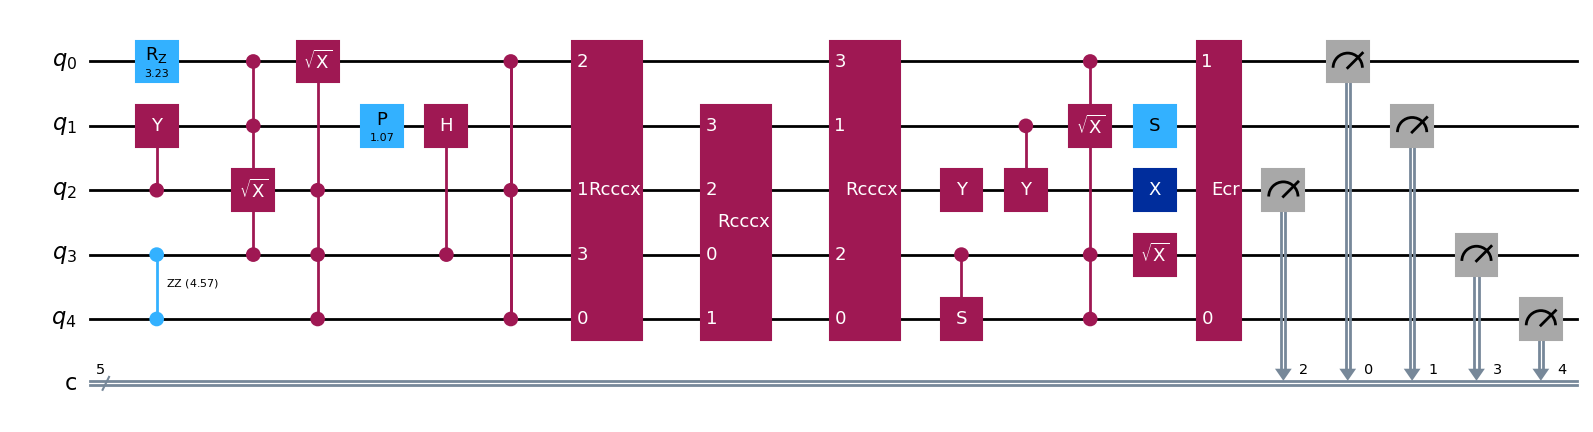

In [3]:
# Visualize a sample circuit
print("Sample Circuit (5 qubits, depth 10):")
sample_qc = random_circuit(5, 10, measure=True)
sample_qc.draw('mpl')

In [4]:
# Configuration
qubit_counts = [16, 18, 20, 22, 24, 26, 28, 30] # Adjust based on memory
depth = 10
shots = 1000

cpu_times = []
gpu_times = []

print(f"Benchmarking with {depth} depth and {shots} shots...")

for n in qubit_counts:
    print(f"Running for {n} qubits...")
    
    # CPU Run
    try:
        t_cpu = benchmark_simulation(n, depth, shots, 'CPU')
        cpu_times.append(t_cpu)
        print(f"  CPU: {t_cpu:.4f}s")
    except Exception as e:
        print(f"  CPU failed: {e}")
        cpu_times.append(None)

    # GPU Run
    try:
        t_gpu = benchmark_simulation(n, depth, shots, 'GPU')
        gpu_times.append(t_gpu)
        print(f"  GPU: {t_gpu:.4f}s")
    except Exception as e:
        print(f"  GPU failed: {e}")
        gpu_times.append(None)

print("Benchmark complete.")

Benchmarking with 10 depth and 1000 shots...
Running for 16 qubits...
  CPU: 0.0478s
  GPU: 1.3775s
Running for 18 qubits...
  CPU: 0.0197s
  GPU: 0.0115s
Running for 20 qubits...
  GPU: 1.3775s
Running for 18 qubits...
  CPU: 0.0197s
  GPU: 0.0115s
Running for 20 qubits...
  CPU: 0.0461s
  GPU: 0.0076s
Running for 22 qubits...
  CPU: 0.0795s
  CPU: 0.0461s
  GPU: 0.0076s
Running for 22 qubits...
  CPU: 0.0795s
  GPU: 0.0217s
Running for 24 qubits...
  GPU: 0.0217s
Running for 24 qubits...
  CPU: 0.5578s
  GPU: 0.0232s
Running for 26 qubits...
  CPU: 0.5578s
  GPU: 0.0232s
Running for 26 qubits...
  CPU: 2.4834s
  GPU: 0.1116s
Running for 28 qubits...
  CPU: 2.4834s
  GPU: 0.1116s
Running for 28 qubits...
  CPU: 12.6850s
  CPU: 12.6850s
  GPU: 0.3739s
Running for 30 qubits...
  GPU: 0.3739s
Running for 30 qubits...
  CPU: 51.2391s
  GPU: 1.5924s
Benchmark complete.
  CPU: 51.2391s
  GPU: 1.5924s
Benchmark complete.


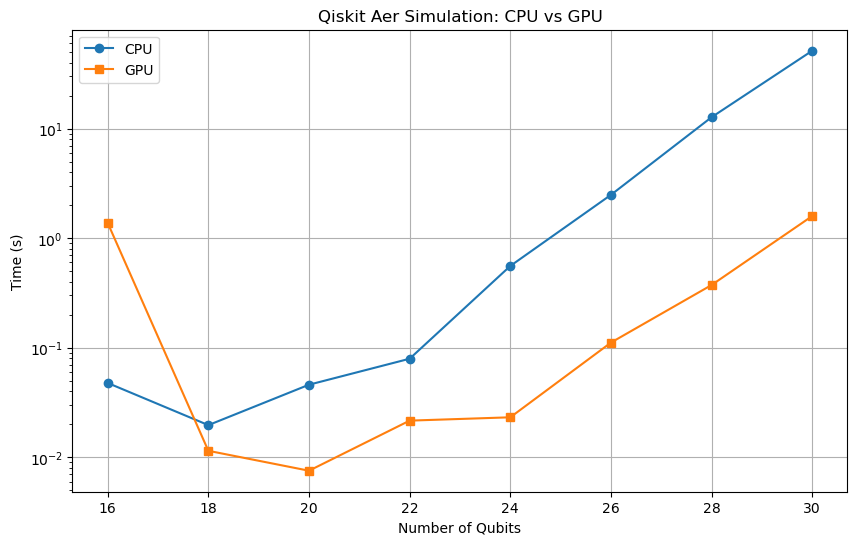

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(qubit_counts, cpu_times, 'o-', label='CPU')
plt.plot(qubit_counts, gpu_times, 's-', label='GPU')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (s)')
plt.title('Qiskit Aer Simulation: CPU vs GPU')
plt.legend()
plt.grid(True)
plt.yscale('log')
#make x axis labels integers
plt.xticks(qubit_counts)
plt.show()